In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [361]:
df = pd.read_csv("loan_default.csv")

In [362]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [363]:
df.drop('LoanID',axis=1,inplace=True)

In [370]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [372]:
binary_cols = ['HasMortgage','HasDependents','HasCoSigner']
for col in binary_cols:
    df[col] = df[col].map({"Yes":1,"No":0})

In [377]:
cat_cols = ['Education','EmploymentType','MaritalStatus','LoanPurpose']
df = pd.get_dummies(df,columns=cat_cols,drop_first=True)

In [381]:
df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'HasMortgage',
       'HasDependents', 'HasCoSigner', 'Default', 'Education_High School',
       'Education_Master's', 'Education_PhD', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Business',
       'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other'],
      dtype='object')

In [383]:
X = df.drop('Default',axis=1)
y = df['Default']

In [385]:
X

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,False,False,False,False,False,False,False,False,False,True
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,False,False,False,False,True,False,False,False,False,True
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,False,False,False,True,False,False,False,False,False,False
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,False,False,False,False,True,False,True,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,...,False,False,False,False,True,False,False,False,False,True
255343,32,51953,189899,511,14,2,11.55,24,0.21,0,...,False,True,False,False,False,False,False,False,True,False
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,...,False,False,True,False,True,False,False,False,False,False
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,...,False,True,False,False,False,True,False,False,False,True


In [387]:
y

0         0
1         0
2         1
3         0
4         0
         ..
255342    0
255343    1
255344    0
255345    0
255346    0
Name: Default, Length: 255347, dtype: int64

In [389]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [391]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [393]:
model.fit(X_train,y_train)

LogisticRegression()

In [395]:
y_pred = model.predict(X_test)

In [405]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [409]:
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[45140  5846]
 [   30    54]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     50986
           1       0.01      0.64      0.02        84

    accuracy                           0.88     51070
   macro avg       0.50      0.76      0.48     51070
weighted avg       1.00      0.88      0.94     51070



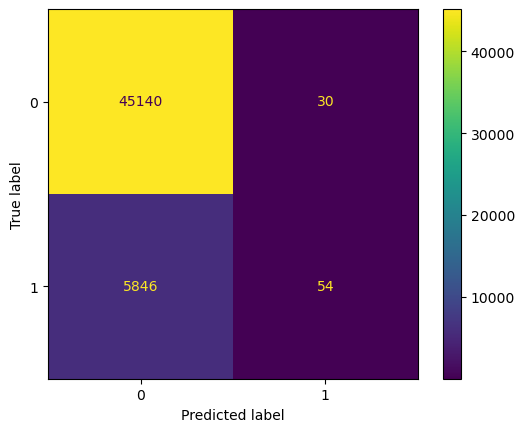

In [425]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

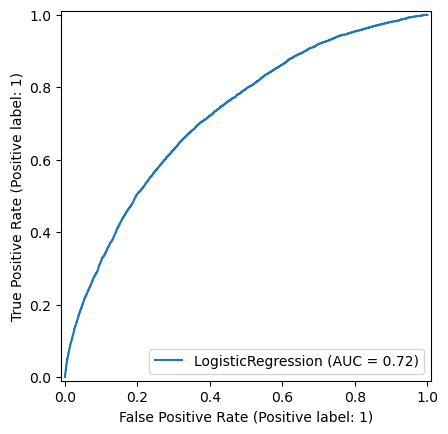

In [427]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

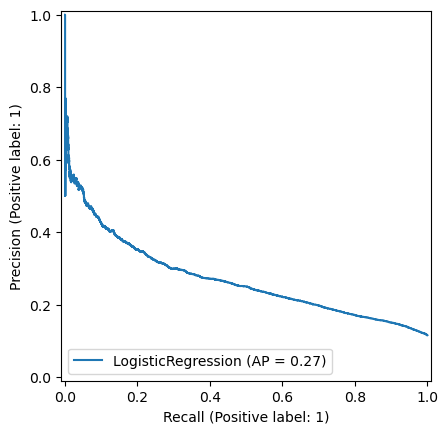

In [429]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.show()

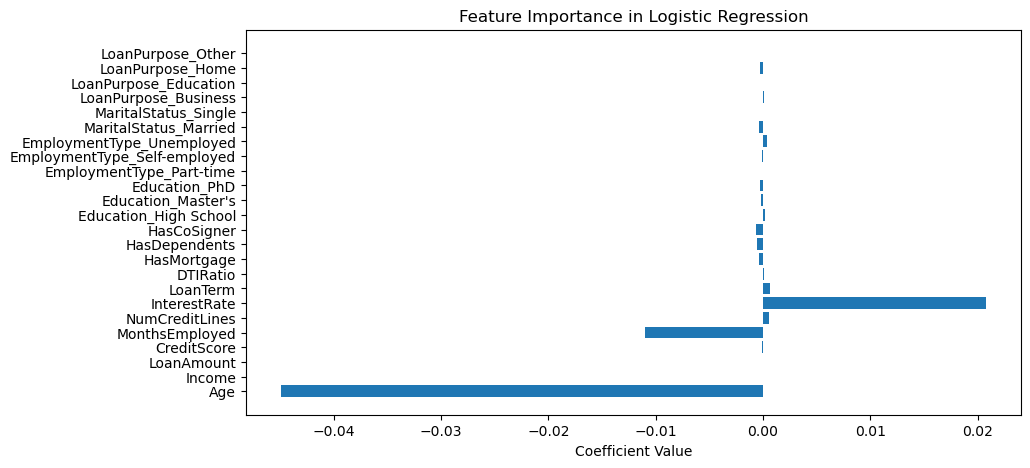

In [423]:
import matplotlib.pyplot as plt
import numpy as np

coef = model.coef_[0]
features = X_train_final.columns

plt.figure(figsize=(10,5))
plt.barh(features, coef)
plt.xlabel("Coefficient Value")
plt.title("Feature Importance in Logistic Regression")
plt.show()
